In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
from utils import *
import utils
import importlib
import random
importlib.reload(utils)



<module 'utils' from '/Users/leila/Desktop/ADA_Project/ada-2024-project-ada212/utils.py'>

In [25]:
#Ensure reproduciblity of numpy computations and sklearn models
np.random.seed(42)
random.seed(42)

# First cleaning of the dataset

The dataset book_adaptations.csv is the resulting dataset from data_extraction.ipynb. It combines informations retrieved from multiple sources listed in the README.md

In [26]:

# Load the csv file 
dataset = pd.read_csv('book_adaptation.csv')
# Display the first few rows
dataset.head()


,movie_title,movie_release,movie_revenue,movie_runtime,movie_languages,movie_countries,movie_genres,movie_wikidata_id,imdb_rating,imdb_total_votes,...,book_thriller,book_detective,book_satire,book_comedy,book_won_price,book_rating,book_publisher,book_ratings_count,book_pages,movie_is_adaptation
0,Ghosts of Mars,2001.0,777058.028297,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",Q261700,4.9,58888.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,Getting Away with Murder: The JonBenét Ramsey ...,2000.0,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",Q16250726,6.1,77.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,Brun bitter,1988.0,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",Q4978832,5.6,42.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,White Of The Eye,1987.0,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",Q7995657,6.1,3090.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,A Woman in Flames,1983.0,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}",Q869644,5.9,648.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


# First statistical description and drop the duplicates

In [27]:
dataset.describe()

,movie_release,movie_revenue,movie_runtime,imdb_rating,imdb_total_votes,movie_budget,book_release,book_part_of_series,literary_work,written_work,...,book_science_fiction,book_horror,book_thriller,book_detective,book_satire,book_comedy,book_won_price,book_rating,book_ratings_count,book_pages
count,75130.000000,9.897000e+03,6.153600e+04,63615.000000,6.361500e+04,1.769500e+04,4161.000000,5062.000000,5062.000000,5062.000000,...,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,3230.000000,3.231000e+03,3153.000000
mean,1977.492333,3.117755e+06,1.118020e+02,6.197835,1.222808e+04,6.584343e+05,1938.311944,0.115172,0.780126,0.202094,...,0.060846,0.036152,0.034571,0.049388,0.016397,0.025484,0.080798,3.886421,1.572839e+05,289.345385
std,29.090768,8.035250e+06,4.351383e+03,1.144797,7.128692e+04,1.252345e+06,54.999325,0.319261,0.414202,0.401602,...,0.239070,0.186686,0.182709,0.216697,0.127008,0.157605,0.272552,0.249760,4.168301e+05,196.087574
min,1010.000000,5.822935e-02,0.000000e+00,1.000000,5.000000e+00,4.342586e-02,1678.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,1.000000
25%,1956.000000,1.965851e+05,8.100000e+01,5.600000,1.220000e+02,5.317417e+04,1905.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.740000,2.207000e+03,164.000000
50%,1985.000000,8.258427e+05,9.300000e+01,6.300000,5.450000e+02,2.658709e+05,1952.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.900000,1.431900e+04,257.000000
75%,2004.000000,2.778871e+06,1.060000e+02,7.000000,2.584000e+03,7.101449e+05,1981.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.060000,1.050280e+05,368.000000
max,2016.000000,2.831111e+08,1.079281e+06,10.000000,2.960759e+06,5.246682e+07,2013.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.620000,6.726008e+06,1720.000000


- movie_runtime: The average runtime is approximately 112 minutes, with a wide range from 0 (indicating missing or incorrect data) to over 1 million minutes, which seems like an outlier or data entry error.

- Release Years: The movie_release feature ranges from 1010 to 2016, indicating that some data might be historically significant or include errors (e.g., movies listed from centuries ago). The mean release year of 1977 suggests a strong representation of 20th-century films.

- movie_revenue and movie_budget: These features show high variability, with standard deviations around $8 million and $1.25 million, and maximum values reaching $283 million and $52 million, respectively. This indicates the presence of high-grossing blockbusters that could skew analysis. Mean values of $3.1 million for revenue and $658,000 for budget suggest a mix of high and low-budget films in the dataset.

In [28]:
# Initial check for duplicates in the dataset
duplicates_initial = sum(dataset.duplicated())
print('Initially the number of duplicates was: ', duplicates_initial)

# Removing the duplicated rows and checking their deletion
dataset = dataset.drop_duplicates()
duplicates_final = sum(dataset.duplicated())
print('Afterwards the number of duplicates becomes: ', duplicates_final)

# Check for duplicates based on 'movie_wikidata_id'
duplicates_initial_wikidata = sum(dataset.duplicated(subset='movie_wikidata_id'))
print('Number of duplicates based on "movie_wikidata_id" before dropping:', duplicates_initial_wikidata)

# Drop duplicated rows based on 'movie_wikidata_id', keeping the first occurrence
dataset = dataset.drop_duplicates(subset='movie_wikidata_id', keep='first')

duplicates_final_wikidata = sum(dataset.duplicated(subset='movie_wikidata_id'))
print('Number of duplicates based on "movie_wikidata_id" after dropping:', duplicates_final_wikidata)

Initially the number of duplicates was:  77
Afterwards the number of duplicates becomes:  0
Number of duplicates based on "movie_wikidata_id" before dropping: 5430
Number of duplicates based on "movie_wikidata_id" after dropping: 0


# Format of the data

First we're going to correct the "movie_language", "movie_countries" and "movie_genres". Indeed, these columns contain dictionary-like structures that need to be parsed and converted into more straightforward formats

In [29]:
# Apply the function to the columns
dataset['movie_languages'] = dataset['movie_languages'].apply(parse_dict_column)
dataset['movie_countries'] = dataset['movie_countries'].apply(parse_dict_column)
dataset['movie_genres'] = dataset['movie_genres'].apply(parse_dict_column)
# Check the results
dataset[['movie_languages', 'movie_countries', 'movie_genres']].head()


,movie_languages,movie_countries,movie_genres
0,English Language,United States of America,Thriller; Science Fiction; Horror; Adventure; ...
1,English Language,United States of America,Mystery; Biographical film; Drama; Crime Drama
2,Norwegian Language,Norway,Crime Fiction; Drama
3,English Language,United Kingdom,Thriller; Erotic thriller; Psychological thriller
4,German Language,Germany,Drama


Instead of having English Language , German Language... We would rather have the language alone, to have a simpler analysis later on.

In [30]:

# Apply the function to the 'movie_languages' column
dataset['movie_languages'] = dataset['movie_languages'].apply(clean_language_format)
dataset['movie_languages'].head()


0      English
1      English
2    Norwegian
3      English
4       German
Name: movie_languages, dtype: object

In [31]:
dataset['movie_genres'] = dataset['movie_genres'].apply(lambda x: x.split('; '))
dataset['movie_languages'] = dataset['movie_languages'].apply(lambda x: x.split('; '))
dataset['movie_countries'] = dataset['movie_countries'].apply(lambda x: x.split('; '))

# Handling missing values

One important factor to aknowledge for when analyzing data is the way we handle missing values. First, we need to see where they are mostly present

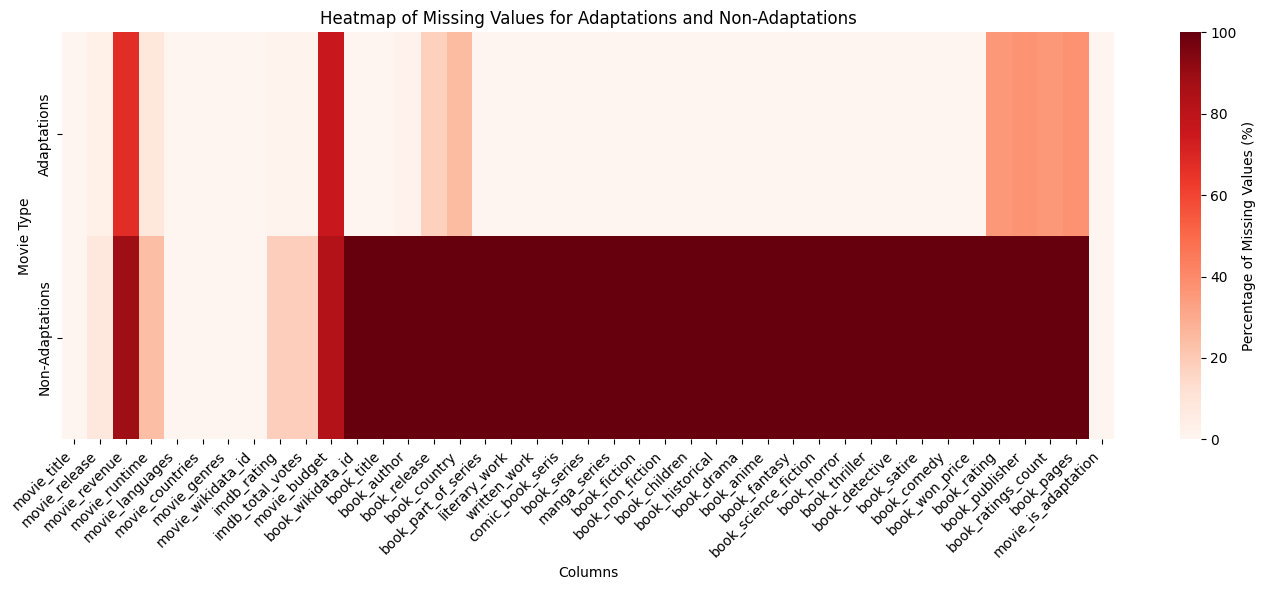

In [32]:
heatmap_missing_values(dataset)

For the non adaptation movies, it is normal not to have informations related to books.

- movie_revenue: This feature has a significant proportion of missing data, especially for non-adaptations, which might impact our analysis on financial performance and budget-revenue comparisons.

- movie_budget: also shows a considerable percentage of missing values for non-adaptations. This could be important for analyzing budget trends and their correlation with box office performance.

- movie_runtime: The percentage of missing values for this feature is moderate, suggesting that while there is data available, some gaps remain. This feature is relevant for exploring how runtime correlates with success metrics.

- imdb_rating and imdb_total_votes: These features are relatively complete for both adaptations and non-adaptations, making them reliable for analyzing the critical and audience reception of movies.

- book_rating and book_ratings_count: The heatmap shows that while there is data available for adaptations, there are still some gaps.

- book_pages: This feature is relevant when assessing whether the length of a book impacts its adaptation's success. The heatmap indicates some missing values for adaptations, which could limit the analysis

### Plot proportion of missing data for movie_revenue and movie_budget over time

In [33]:
# Calculate the percentage of missing revenue and budget data by year
missing_revenue_by_year_adapt = proportion_missing_values(dataset, 'movie_revenue', 'movie_release', True)
missing_revenue_by_year_non_adapt= proportion_missing_values(dataset, 'movie_revenue', 'movie_release', False)
missing_budget_by_year_adapt = proportion_missing_values(dataset, 'movie_budget', 'movie_release', True)
missing_budget_by_year_non_adapt = proportion_missing_values(dataset, 'movie_budget', 'movie_release', False)


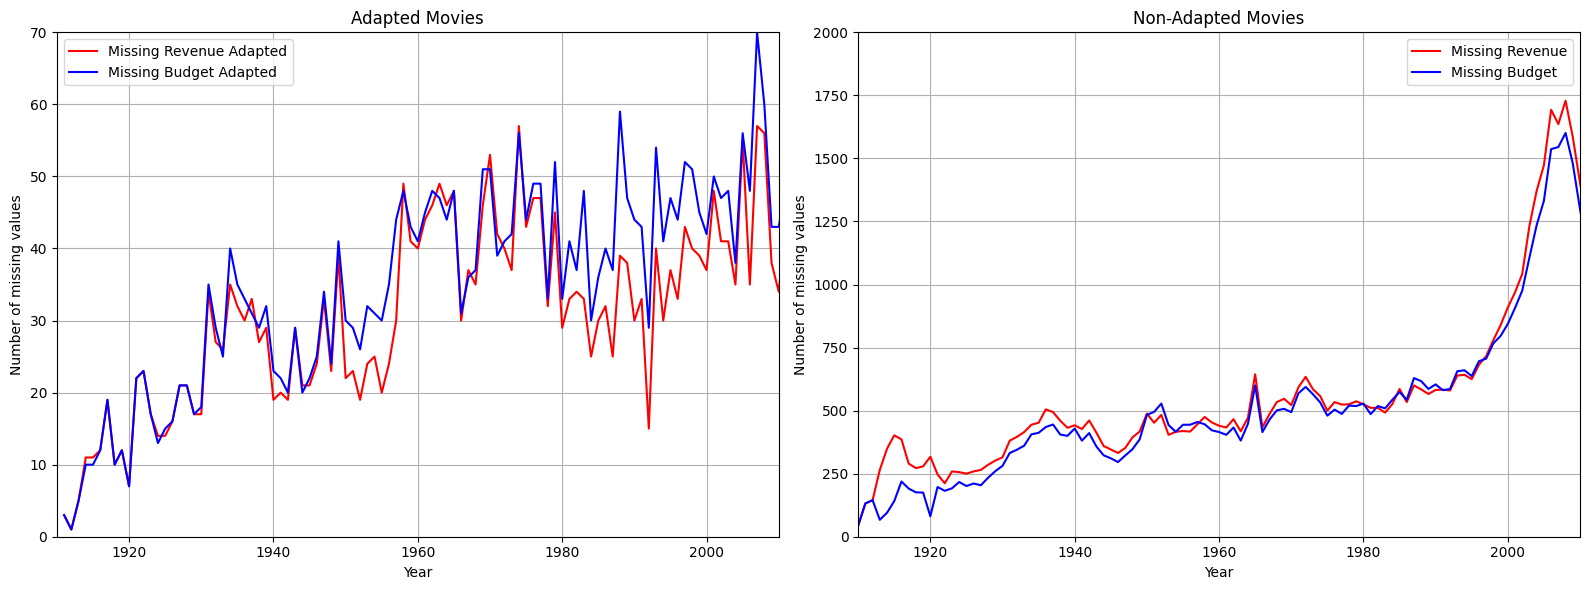

In [34]:
plot_missing_revenues_budget(missing_revenue_by_year_adapt,missing_budget_by_year_adapt,missing_revenue_by_year_non_adapt,missing_budget_by_year_non_adapt)

- Adapted Movies:

    The number of missing values for both movie_revenue and movie_budget has fluctuated but generally increased over time.
    
    Post-1960s, there is a more noticeable increase, indicating more adaptations with incomplete data, possibly due to a rise in movie production.

- Non-Adapted Movies:

    A more consistent trend is observed, with missing values for both features gradually increasing over time, especially from the 1980s onward.

    The late 20th century and early 21st century show a sharp rise in missing data, which may reflect the growth in movie production but incomplete financial records.

For both groups we observe a higher number of missing values in more recent movies.

In [35]:
missing_budget_count = dataset['movie_budget'].isna().sum()
print(f"Number of missing values in 'movie_budget': {missing_budget_count}")

missing_revenue_count = dataset['movie_revenue'].isna().sum()
print(f"Number of missing values in 'movie_revenue': {missing_revenue_count}")

Number of missing values in 'movie_budget': 62772
Number of missing values in 'movie_revenue': 66785


So there are approximately 80% of NAs for revenue and budget. This very large number is inconvenient for our analysis since we want to explore how books traits could lead to successful adaptations. We decided to use an auxiliary dataset composed of 20-25% of our original dataset to get these informations. 

In [36]:
#auxiliary dataset composed of rows with at least one of revenue or budget non missing
auxiliary_dataset_revenue_budget = dataset.dropna(subset=['movie_revenue', 'movie_budget'], how='all')

#Ensure we have 20-25% of the original dataset as expected
print(proportion_of_dataset(dataset, auxiliary_dataset_revenue_budget))


24.15383208579901


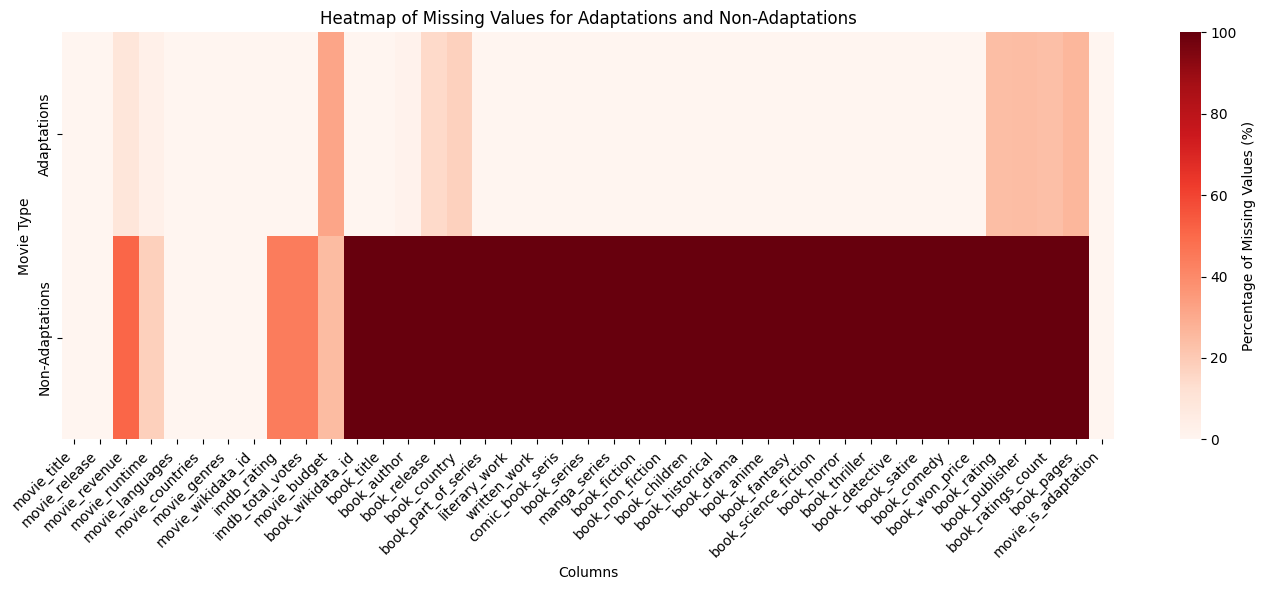

In [37]:
#Visualize distribution of NAs in the auxiliary dataset
heatmap_missing_values(auxiliary_dataset_revenue_budget)

### Handle NAs for book_pages and movie_runtime

In [38]:
#Keep count of NAs before imputation 

# Count the number of missing 'book_pages' only for adaptations
missing_book_pages_count = dataset[dataset['movie_is_adaptation'] == True]['book_pages'].isna().sum()

# Calculate the proportion of missing 'book_pages' for adaptations
total_adaptations = dataset[dataset['movie_is_adaptation'] == True].shape[0]
proportion_missing_book_pages = (missing_book_pages_count / total_adaptations) * 100

#Count the number of missing 'movie_runtime'
missing_runtime_count = dataset['movie_runtime'].isna().sum()


In [39]:
# Fill NaNs in 'book_pages' and 'movie_runtime' with their respective medians
dataset['book_pages'].fillna(dataset['book_pages'].median())
dataset['movie_runtime'].fillna(dataset['movie_runtime'].median())

0         98.0
1         95.0
2         83.0
3        110.0
4        106.0
         ...  
82053    120.0
82054     96.0
82055     66.0
82056    150.0
82057     86.0
Name: movie_runtime, Length: 76551, dtype: float64

In [40]:
# Print the count of NaNs before filling
print("Before filling NaNs:")
print(f"Missing 'book_pages' count for adaptations: {missing_book_pages_count}")
print(f"Proportion of missing 'book_pages' for adaptations: {proportion_missing_book_pages:.2f}%")
print(f"Number of missing values in 'movie_runtime': {missing_runtime_count}")

# Print the count of NaNs after filling
print("\nAfter filling NaNs:")
print(f"Missing 'book_pages' count: {dataset['book_pages'].isna().sum()}")
print(f"Missing 'movie_runtime' count: {dataset['movie_runtime'].isna().sum()}")


Before filling NaNs:
Missing 'book_pages' count for adaptations: 1839
Proportion of missing 'book_pages' for adaptations: 37.52%
Number of missing values in 'movie_runtime': 17702

After filling NaNs:
Missing 'book_pages' count: 73489
Missing 'movie_runtime' count: 17702


#### Why do we think it is okay to use this method for imputation 
Filling NaNs for book_pages and movie_runtime with the median is appropriate because these features are continuous and have natural variability within a typical range. The median provides a central value that represents the majority of observations without being skewed by outliers. This ensures that the imputed values align with realistic counts for book pages and movie runtimes, maintaining the integrity of the data for further analysis.

### Assessing usability of book_ratings 

In [41]:
print_missing_values_summary(dataset, ['book_rating'], adaptation=True)

Count of adapted movies: 4901

Missing Values Summary:
book_rating: 1764 missing values (35.99%)

Proportion of missing values for adaptations:
book_rating: 35.99%

Proportion of missing values for the entire dataset (including non-adaptations):
book_rating: 2.30%


With 35.99% of book_rating data missing for adaptations, there is still a majority (about 64%) of data available. So we have enough data to perform meaningful analyses, but any conclusions drawn may be influenced by the missing values.

# Handling outliers
Based on the statistical description of the dataset performed earlier, we can see that outliers values are present only for the runtime features.

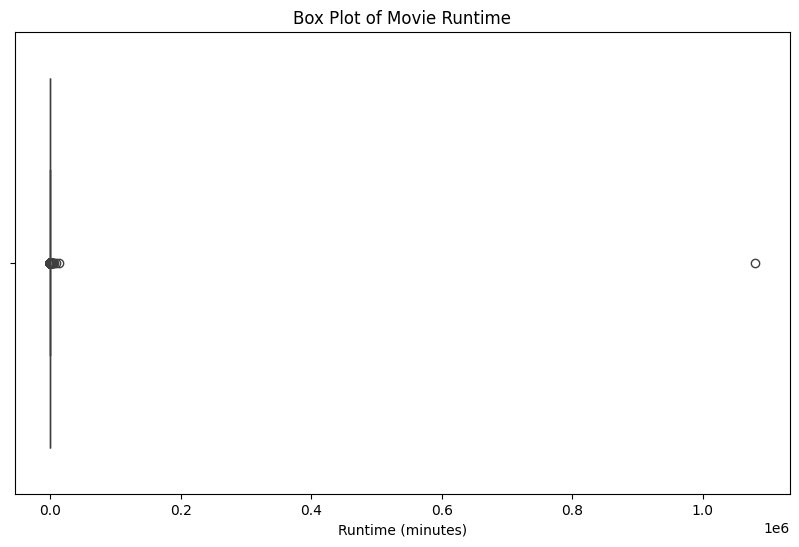

In [42]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=dataset['movie_runtime'])
plt.title('Box Plot of Movie Runtime')
plt.xlabel('Runtime (minutes)')
plt.show()

In [43]:
# We searched for the longest movie existing and it appeared to be 240h long so 14400 min
threshold = 14400

# Identify high outliers
high_outliers = dataset[dataset['movie_runtime'] > threshold]
print("Number of high outliers using percentile:", high_outliers.shape[0])
print("High outliers:\n", high_outliers['movie_runtime'])

#Deletion of the outlier from the dataset
dataset=dataset.drop(high_outliers.index)

Number of high outliers using percentile: 1
High outliers:
 12858    1079281.0
Name: movie_runtime, dtype: float64


In [44]:
dataset.to_csv('dataset_intermediary.csv')

# Feature engineering 

We may consider creating some features that will later serve for our analysis

In [45]:
#Dataset
# Time gap between movie release and book relase
dataset['time_gap'] = dataset['movie_release'] - dataset['book_release']

#measure profitability of a movie
dataset['revenue_budget_ratio'] = dataset['movie_revenue'] / dataset['movie_budget']

#Auxiliary Dataset
auxiliary_dataset_revenue_budget['time_gap'] = auxiliary_dataset_revenue_budget['movie_release'] - auxiliary_dataset_revenue_budget['book_release']
auxiliary_dataset_revenue_budget['revenue_budget_ratio'] =auxiliary_dataset_revenue_budget['movie_revenue'] / auxiliary_dataset_revenue_budget['movie_budget']